## Import Necessary Libraries

In [1]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [2]:
source_path = 'breast_cancer_data'

#print how many images in each class
for label in ['benign', 'malignant', 'normal']:
    print(f"There are {len(os.listdir(os.path.join(source_path, str(label))))} images of {label} tumor status.")

There are 438 images of benign tumor status.
There are 211 images of malignant tumor status.
There are 134 images of normal tumor status.


## Visual Exploration

Display random sample images from each of the three diagnosis classes to understand data better:

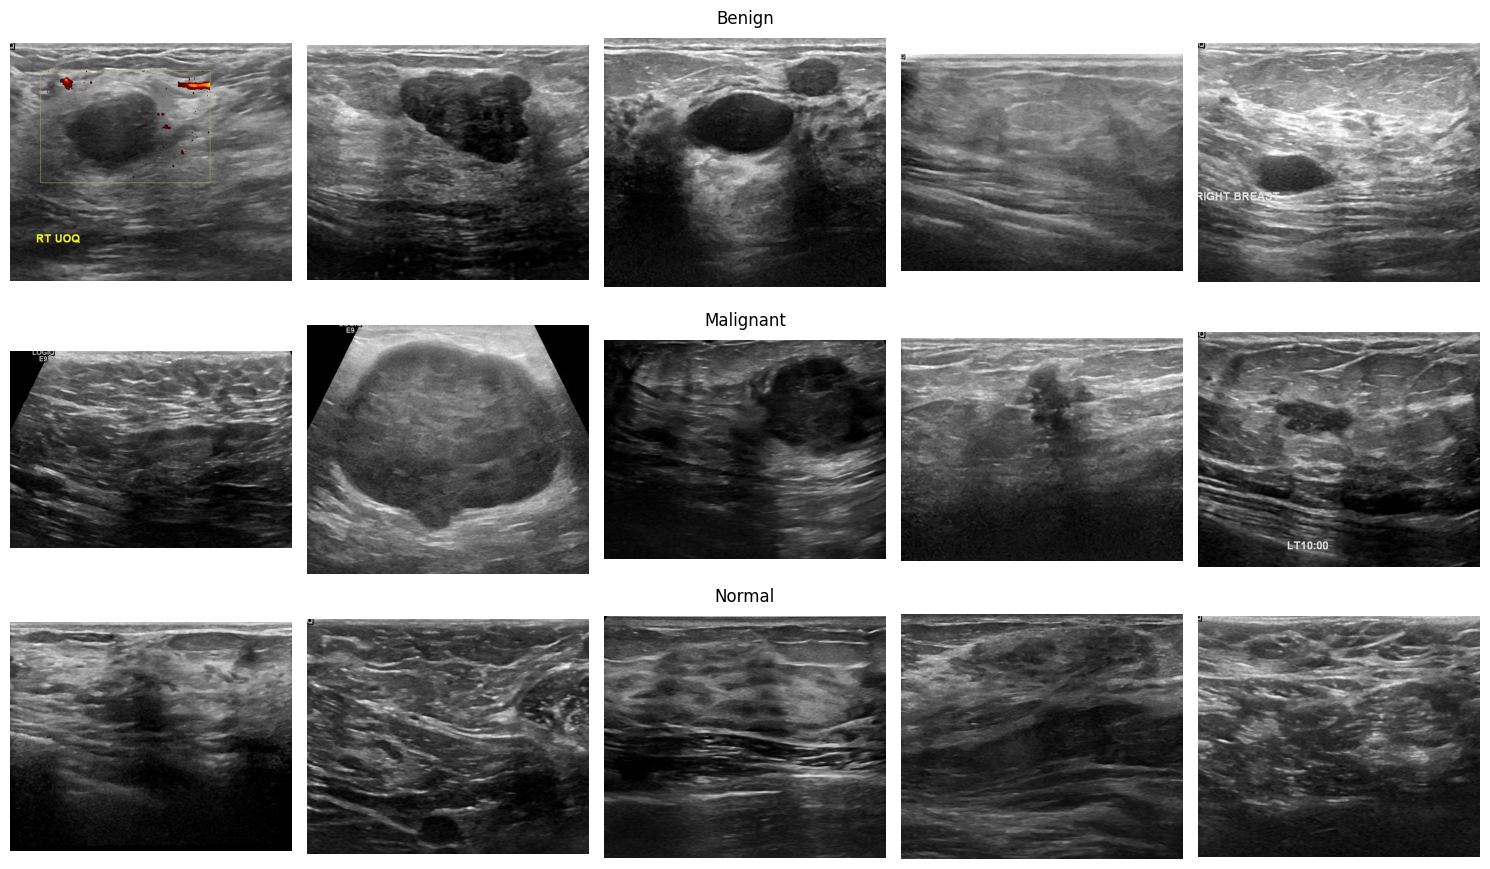

In [3]:
fig = plt.figure(figsize=(15, 9))

#for each class, randomly select and display 5 images on plot
for i, class_name in enumerate(['benign', 'malignant', 'normal']):
    class_path = f'breast_cancer_data/{class_name}'
    images = os.listdir(class_path)
    
    for j in range(5):
        img = plt.imread(f'{class_path}/{random.choice(images)}')
        fig.add_subplot(3, 5, i*5+j+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        if j == 2:
            plt.title(class_name.capitalize(), fontsize=12, pad=10)

plt.tight_layout()
plt.show()

In [4]:
#print random image size to understand sizing
img = plt.imread(f'breast_cancer_data/benign/{random.choice(os.listdir("breast_cancer_data/benign"))}')
print(f"Image size: {img.shape}")

Image size: (468, 555, 3)


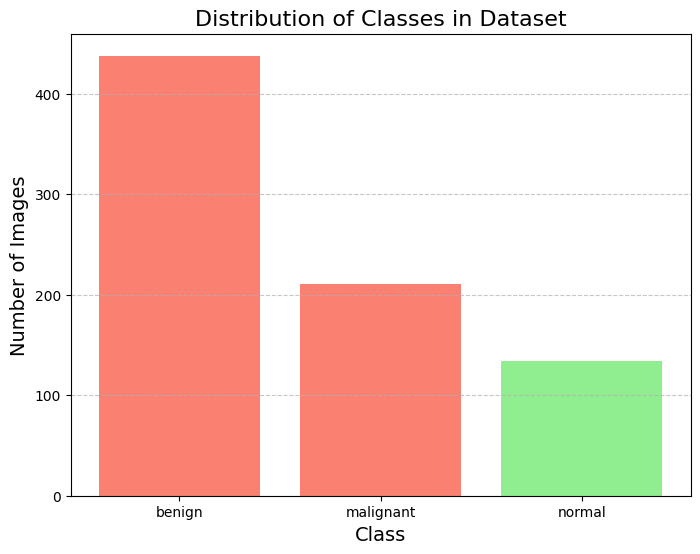

In [5]:
#define class names
class_names = ['benign', 'malignant', 'normal']
class_counts = []

#count items in each class
for class_name in class_names:
    class_path = f'breast_cancer_data/{class_name}'
    count = len(os.listdir(class_path))
    class_counts.append(count)

#plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color=['salmon', 'salmon', 'lightgreen'])
plt.title('Distribution of Classes in Dataset', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Create New File Storage Directories

In [6]:
#new root directory
root_dir = 'split_data'

#empty directory to prevent future issues
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

#create training, test, val subdirectories
def create_train_val_dirs(root_path):
  #create folder for each class in each subdirectory
  for name in class_names:
    for name2 in ['training','validation','test']:
      os.makedirs(os.path.join(root_path,name2,str(name)))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("Error: File already exists.")

In [7]:
#print existing directories to check
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

split_data/test
split_data/training
split_data/validation
split_data/test/malignant
split_data/test/benign
split_data/test/normal
split_data/training/malignant
split_data/training/benign
split_data/training/normal
split_data/validation/malignant
split_data/validation/benign
split_data/validation/normal


## Split Data into Train, Test, Val datasets

In [8]:
#define function for splitting data into train, test, val directories
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, TRAIN_SPLIT, VAL_SPLIT):
    np.random.seed(42)
    files = []
    for name in os.listdir(SOURCE_DIR):
        if os.path.getsize(os.path.join(SOURCE_DIR, name)) > 0:
            files.append(name)
    random.shuffle(files)

    train_size = int(len(files) * TRAIN_SPLIT)
    val_size = int(len(files) * VAL_SPLIT)

    for name in files[:train_size]:
        shutil.copy(os.path.join(SOURCE_DIR, name), os.path.join(TRAINING_DIR, name))
    for name in files[train_size:train_size + val_size]:
        shutil.copy(os.path.join(SOURCE_DIR, name), os.path.join(VALIDATION_DIR, name))
    for name in files[train_size + val_size:]:
        shutil.copy(os.path.join(SOURCE_DIR, name), os.path.join(TEST_DIR, name))

In [9]:
TRAINING_DIR = "split_data/training/"
VALIDATION_DIR = "split_data/validation/"
TEST_DIR = "split_data/test/"

#empty directories to prevent future errors from multiple runs
for i in class_names:
  label_train_dir = os.path.join(TRAINING_DIR, str(i))
  label_val_dir = os.path.join(VALIDATION_DIR, str(i))
  label_test_dir = os.path.join(TEST_DIR, str(i))
  if len(os.listdir(label_train_dir)) > 0:
    for file in os.scandir(label_train_dir):
      os.remove(file.path)
  if len(os.listdir(label_val_dir)) > 0:
    for file in os.scandir(label_val_dir):
      os.remove(file.path)
  if len(os.listdir(label_test_dir)) > 0:
    for file in os.scandir(label_test_dir):
      os.remove(file.path)

#split proportions
train_split = 0.7
val_split = 0.2
test_split = 0.1

#execute split
for i in class_names:
  label_train_dir = os.path.join(TRAINING_DIR, str(i))
  label_val_dir = os.path.join(VALIDATION_DIR, str(i))
  label_test_dir = os.path.join(TEST_DIR, str(i))
  split_data(SOURCE_DIR=os.path.join(source_path, str(i)),
             TRAINING_DIR=label_train_dir,
             VALIDATION_DIR=label_val_dir,
             TEST_DIR=label_test_dir,
             TRAIN_SPLIT=train_split,
             VAL_SPLIT=val_split)

#print number of files in each group
for i in class_names:
  print(f"There are {len(os.listdir(os.path.join(TRAINING_DIR, str(i))))} images of a {i} tumor diagnosis in the training set")
  print(f"There are {len(os.listdir(os.path.join(VALIDATION_DIR, str(i))))} images of a {i} tumor diagnosis in the validation set")
  print(f"There are {len(os.listdir(os.path.join(TEST_DIR, str(i))))} images of a {i} tumor diagnosis in the test set")


There are 306 images of a benign tumor diagnosis in the training set
There are 87 images of a benign tumor diagnosis in the validation set
There are 45 images of a benign tumor diagnosis in the test set
There are 147 images of a malignant tumor diagnosis in the training set
There are 42 images of a malignant tumor diagnosis in the validation set
There are 22 images of a malignant tumor diagnosis in the test set
There are 93 images of a normal tumor diagnosis in the training set
There are 26 images of a normal tumor diagnosis in the validation set
There are 15 images of a normal tumor diagnosis in the test set
